# Krittika Convener Selection Assignments
## Python Assignment

1. You may find the **KSP tutorials** useful: https://github.com/krittikaiitb/tutorials - Tutorials 1,2,3, and 4 are particularly relevant. These cover basic `python`, `numpy`, functions in `python` and `matplotlib` respectively.

2. A helpful reminder that executing a cell with `help` (for example: `help(np.loadtxt)` or `np.loadtxt?`) will show the documentation for that function.

3. The use of internet is completely ALLOWED for solving this assignment.
4. Feel free to use multiple cells for your solutions. But keep them separate for each question (don't use a cell to solve Q1 after Q2)

### Q1: Parsing Form Responses (10 points)
Suppose you have collected responses from various IITB students using a google form and the responses have been extracted as a csv file. You want to mail all the people who have filled the form now. The email client used by LDAP mail accepts a single string of comma separated email adresses (note that {rollnumber}@iitb.ac.in will redirect to respective student). 

Your task is to parse the CSV file and generate the comma separated string.

For example, if the csv file contains 

| Sr. No | Name | Roll Number |
| -------- | -------- | -------- |
| 1     | Newton     | 2000001    |
| 2     | Galileo     | 2000005    |
| 3     | Kepler     | 2000010    |


Then your program should print the string `2000001@iitb.ac.in, 2000005@iitb.ac.in, 2000010@iitb.ac.in`

In [39]:
file1 = "Dataset_Q1.csv"

You may find `numpy.loadtxt` or `numpy.genfromtxt` to be useful here. Feel free to use any method you wish to load the data from `file1`.

Write your code as a function that takes in the data file as input and returns the relevant string.

In [40]:
# Solution Code
import numpy as np
def get_emails(file):
    #print(file)
    for i in range(file.size-1):
        print('{0}@iitb.ac.in'.format(file[i]), end=', ')
    print('{0}@iitb.ac.in'.format(file[file.size-1]), end='')
    ...
roll_no = np.loadtxt(file1, dtype=int, delimiter=',', usecols=(2))
get_emails(roll_no)

20000003@iitb.ac.in, 20000006@iitb.ac.in, 20010000@iitb.ac.in, 19020000@iitb.ac.in, 20000304@iitb.ac.in

### Q2: The moons of Endor (20 points)

Endor is a fictional planet from the [Star Wars](https://starwars.fandom.com/wiki/Endor_(planet)) universe which has 9 major moons. The masses, semimajor axes and time periods of each of these moons is given in `Dataset_Q2.csv`. The masses (*m*) are given as a fraction of the mass of Endor itself, the semimajor axis (*a*) as a fraction of the radius of Endor and time period (*T*) in Endor days.

<b style='color:red;'>Note for Star Wars fans</b>: First, are you ok? Second, the values are fabricated, don't go looking for reasons why the data can't hold up to random in-universe information.

In [2]:
file2 = 'Dataset_Q2.csv'

Recall the usual Kepler's third law which can be written as 
$$\frac{a^{3/2}}{T} = \sqrt{\frac{G(M_{planet}+m_{moon})}{4\pi^2}}$$
where $a$ is the semimajor axis, $T$ is the time period, $M_{planet}$ is the mass of the planet, $m_{moon}$ is the mass of the moon, and $G$ is the universal gravitational constant.


We plan to fit the data we have to the power law relation 
$$\frac{a^{x}}{T} = \sqrt{\frac{G(M_{planet}+m_{moon})}{4\pi^2}}$$

Your task is to determine the constant $x$ by fitting the given 'experimental' data and decide whether Kepler's law (with $x$ = 1.5) holds, in the galaxy far far away (where star wars happens). Also find the value of $G$ in the given unit system.


Hint: `numpy.polyfit` or `scipy.optimize.curve_fit` (and maybe `numpy.log`) might be useful for solving this question.

In [63]:
# Code here
...
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

M_planet = 1.
m_moon = np.loadtxt(file2, dtype=float,delimiter=',',usecols=(0))
T = np.loadtxt(file2, dtype=float,delimiter=',',usecols=(1))
a = np.loadtxt(file2, dtype=float, delimiter=',',usecols=(2))

x_data = a
y_data = T * np.sqrt(M_planet + m_moon)

#This function defines the power law relation between T(y or what it returns) and a(x, input).
def pow_func(a,power,G):
    return (a**power)/(np.sqrt(G/(4*(np.pi**2))))

#Here I am trying to find x(power) and the constant(sqrt(G/4pi^2)*scaling facors).
params,params_covarience = optimize.curve_fit(pow_func,x_data,y_data)

x = params[0]
print(params[1]) #value of G in given terms

85490728.14561997


In [29]:
print('x={}'.fmat(x))

x=2.5742326611660213


## Q2 Bonus (10 points): 
Make a plot of the power law curve you have found, and the scatter plot the data points on top of this curve, to establish that your fit is good.

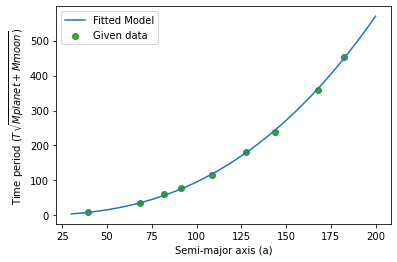

In [65]:
# Code here

plt.figure()
plt.xlabel("Semi-major axis (a)")
plt.ylabel("Time period ($T\sqrt{Mplanet + Mmoon}$)")

plt.scatter(x_data,y_data,label='Given data',color='green',alpha=0.75)

semi_major_axis = np.linspace(30,200,num=365)
plt.plot(semi_major_axis,pow_func(semi_major_axis,params[0],params[1]),label='Fitted Model')

plt.legend()

